In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
import os
print(os.getcwd())

E:\fraud-detection-project


1. Loading and inspecting dataset...
Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672 

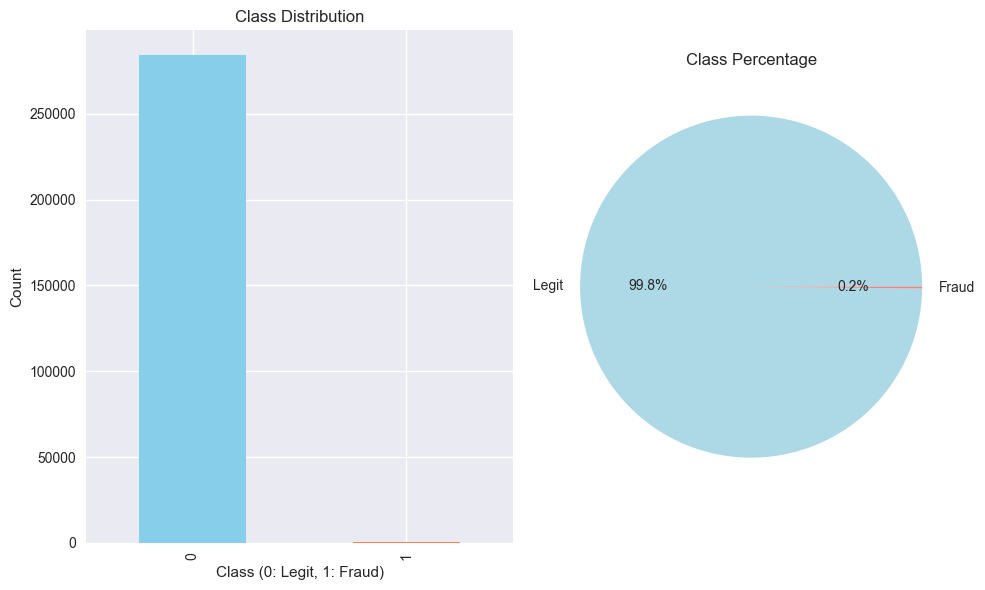

In [4]:
print("1. Loading and inspecting dataset...")

# Load the dataset
df = pd.read_csv('data/raw/creditcard.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

# Check class distribution
print("\nClass distribution:")
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100
print(class_counts)
print(f"Percentages:\n{class_percentages}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=['Legit', 'Fraud'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Class Percentage')

plt.tight_layout()
plt.show()

In [11]:
print("\n2. Handling missing values and duplicates...")

print(f"\nNaN values in original data: {df.isna().sum().sum()}")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Remove any NaN values if they exist
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print(f"✓ Removed {df.isnull().sum().sum()} NaN values")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    # Handle missing values if any
    df = df.dropna()
    print("Missing values removed")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"{duplicates} duplicates removed")
else:
    print("No duplicates found")

print(f"Dataset shape after cleaning: {df.shape}")



2. Handling missing values and duplicates...

NaN values in original data: 1808
Missing values per column:
Amount_Bins    1808
dtype: int64
✓ Removed 0 NaN values
Missing values per column:
Series([], dtype: int64)
No missing values found!
Number of duplicates: 0
No duplicates found
Dataset shape after cleaning: (281918, 34)



3. Feature analysis...


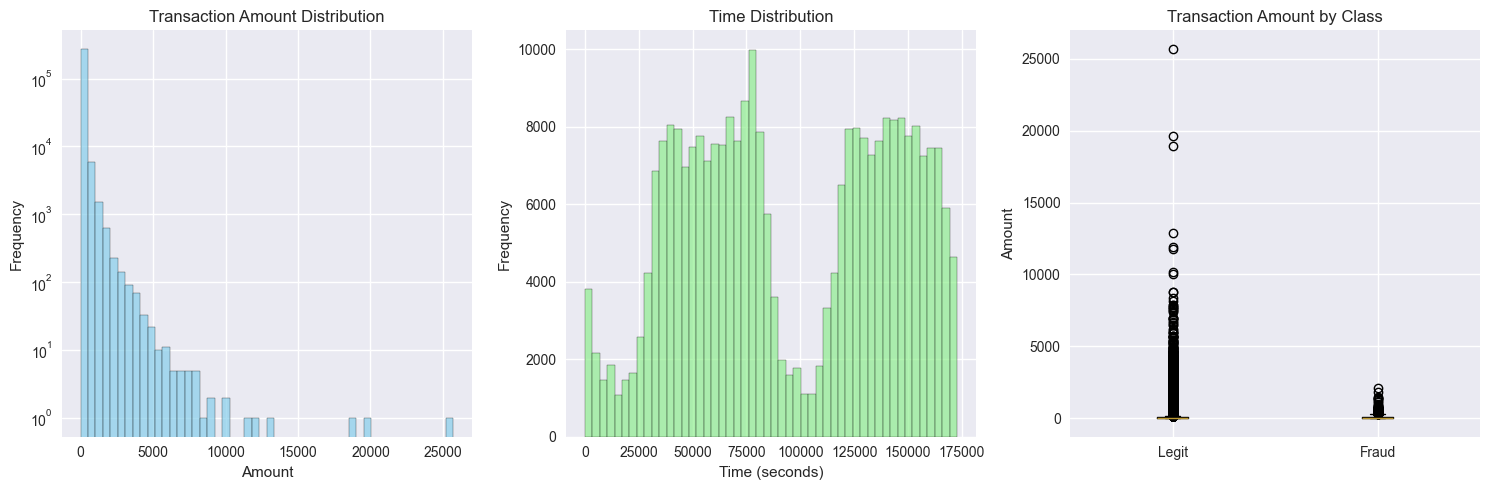


Amount statistics by class:
          count        mean         std   min   25%     50%       75%  \
Class                                                                   
0      281470.0   88.973639  251.071582  0.01  5.99  22.520   78.0075   
1         448.0  130.784353  265.688950  0.01  1.00  17.225  111.8575   

            max  
Class            
0      25691.16  
1       2125.87  


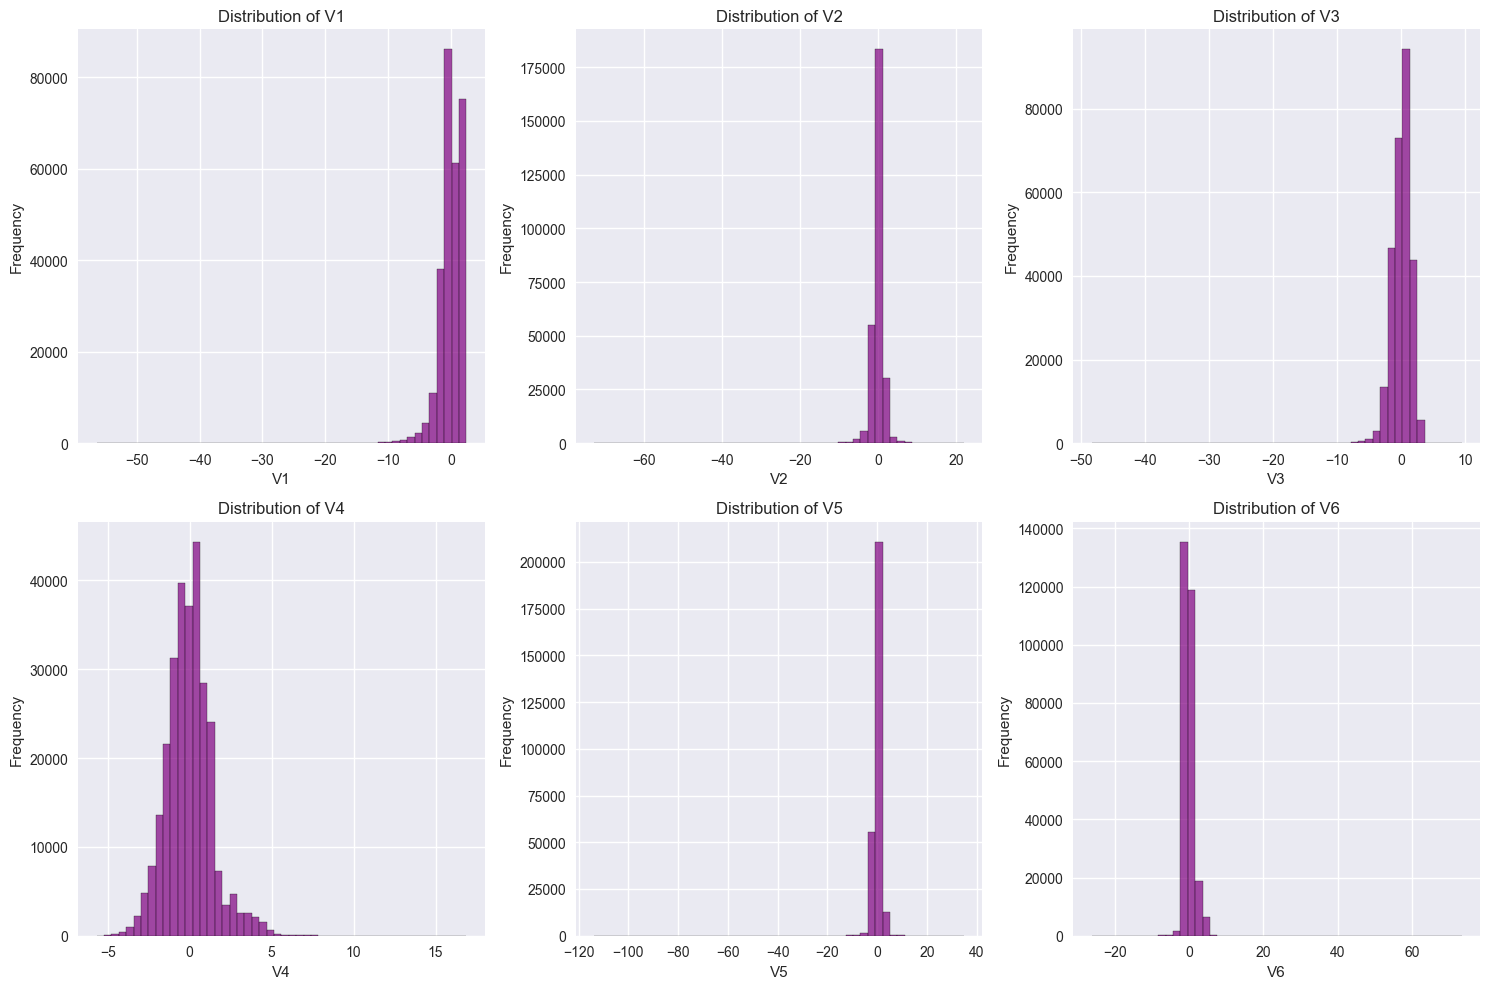

In [14]:
print("\n3. Feature analysis...")

# Analyze Amount distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visualization

plt.subplot(1, 3, 2)
plt.hist(df['Time'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
# Amount by class
legit_amounts = df[df['Class'] == 0]['Amount']
fraud_amounts = df[df['Class'] == 1]['Amount']

plt.boxplot([legit_amounts, fraud_amounts], labels=['Legit', 'Fraud'])
plt.title('Transaction Amount by Class')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

# Statistical analysis of Amount by class
print("\nAmount statistics by class:")
print(df.groupby('Class')['Amount'].describe())

# Analyze V features distribution
v_features = [f'V{i}' for i in range(1, 29)]

# Plot distribution of first few V features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(v_features[:6], 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=50, alpha=0.7, color='purple', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



4. Feature engineering...
New features created: Hour, Day, Amount_Bins


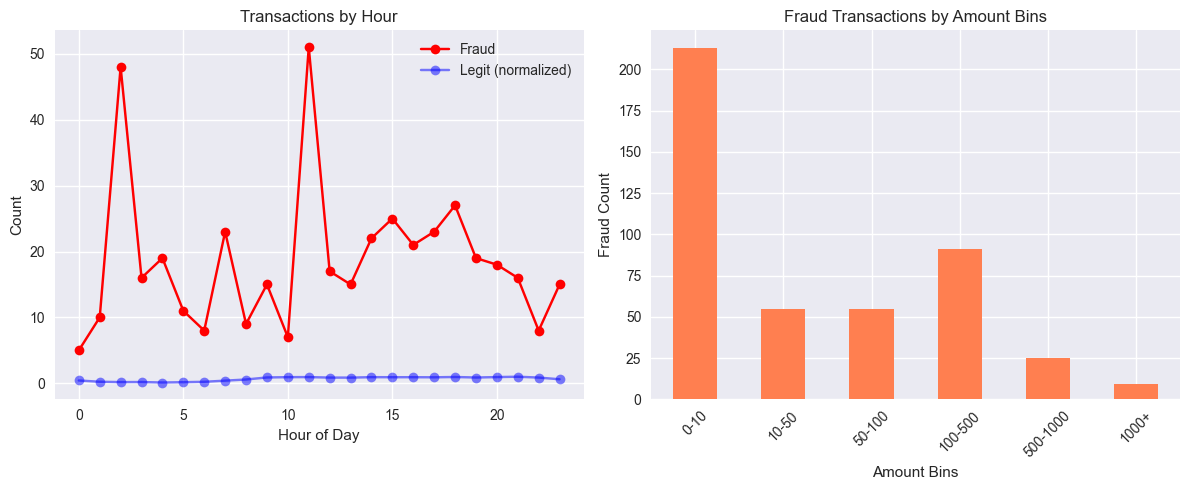

In [15]:
print("\n4. Feature engineering...")

# Create time-based features
df['Hour'] = (df['Time'] // 3600) % 24  # Extract hour of day
df['Day'] = (df['Time'] // (3600 * 24)) % 7  # Extract day of week

# Create transaction frequency features (simplified)
df['Amount_Bins'] = pd.cut(df['Amount'], bins=[0, 10, 50, 100, 500, 1000, np.inf], 
                          labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+'])

print("New features created: Hour, Day, Amount_Bins")

# Visualize fraud by hour
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fraud_by_hour = df[df['Class'] == 1].groupby('Hour').size()
legit_by_hour = df[df['Class'] == 0].groupby('Hour').size()

plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', color='red', label='Fraud')
plt.plot(legit_by_hour.index, legit_by_hour.values / legit_by_hour.values.max(), 
         marker='o', color='blue', alpha=0.5, label='Legit (normalized)')
plt.title('Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
fraud_by_amount_bin = df[df['Class'] == 1].groupby('Amount_Bins').size()
fraud_by_amount_bin.plot(kind='bar', color='coral')
plt.title('Fraud Transactions by Amount Bins')
plt.xlabel('Amount Bins')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
print("\n5. Scaling features...")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Features to scale
features_to_scale = ['Time', 'Amount'] + v_features + ['Hour', 'Day']

# Initialize scaler
scaler = StandardScaler()

# Scale features
X_scaled = X.copy()
X_scaled[features_to_scale] = scaler.fit_transform(X[features_to_scale])

print("✓ Features scaled using StandardScaler")

# Verify scaling
print("\nScaled features statistics:")
print(X_scaled[['Time', 'Amount']].describe())


5. Scaling features...
✓ Features scaled using StandardScaler

Scaled features statistics:
               Time        Amount
count  2.819180e+05  2.819180e+05
mean   6.452193e-17 -3.105118e-17
std    1.000002e+00  1.000002e+00
min   -1.997854e+00 -3.545602e-01
25%   -8.550226e-01 -3.307450e-01
50%   -2.135280e-01 -2.649943e-01
75%    9.371549e-01 -4.317036e-02
max    1.641783e+00  1.019598e+02


In [17]:
print("\n6. Splitting data into train and test sets...")

# Split before any balancing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution in splits
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")


6. Splitting data into train and test sets...
Training set shape: (225534, 33)
Test set shape: (56384, 33)
Training set class distribution:
Class
0    225176
1       358
Name: count, dtype: int64
Test set class distribution:
Class
0    56294
1       90
Name: count, dtype: int64


In [19]:
# STEP 7: Handle Class Imbalance (Multiple Approaches)
print("\n7. Handling class imbalance...")

# Approach 1: Keep original imbalanced data
X_train_imbalanced = X_train.copy()
y_train_imbalanced = y_train.copy()

print("Approach 1: Imbalanced data (for anomaly detection)")
print(f"Training set - Fraud cases: {y_train_imbalanced.sum()} ({y_train_imbalanced.mean()*100:.3f}%)")

# Approach 2: Undersampling
print("\nApproach 2: Undersampling majority class...")

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(f"After undersampling - Training set shape: {X_train_under.shape}")
print(f"Class distribution after undersampling:\n{pd.Series(y_train_under).value_counts()}")


7. Handling class imbalance...
Approach 1: Imbalanced data (for anomaly detection)
Training set - Fraud cases: 358 (0.159%)

Approach 2: Undersampling majority class...
After undersampling - Training set shape: (716, 33)
Class distribution after undersampling:
Class
0    358
1    358
Name: count, dtype: int64


In [20]:
print("\n8. Saving processed datasets...")

import os

# Create processed directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save different versions for different modeling approaches

# 1. Original cleaned dataset
df_cleaned = X_scaled.copy()
df_cleaned['Class'] = y
df_cleaned.to_csv('data/processed/cc_cleaned.csv', index=False)
print("Saved: data/processed/cc_cleaned.csv")

# 2. Train/test splits
train_data = X_train.copy()
train_data['Class'] = y_train
test_data = X_test.copy()
test_data['Class'] = y_test

train_data.to_csv('data/processed/cc_train.csv', index=False)
test_data.to_csv('data/processed/cc_test.csv', index=False)
print("Saved: data/processed/cc_train.csv")
print("Saved: data/processed/cc_test.csv")



8. Saving processed datasets...
Saved: data/processed/cc_cleaned.csv
Saved: data/processed/cc_train.csv
Saved: data/processed/cc_test.csv
